In [1]:
import pandas as pd
import numpy as np
!ls ../data
import matplotlib.pyplot as plt
import seaborn as sns

baseline_weights.pth	      sample_submission.csv  train_128_feather
class_map.csv		      test.csv		     train.csv
hind_siliguri_normal_500.ttf  toy_data.csv


In [8]:
TRAIN = "../data/train.csv"
data = pd.read_csv(TRAIN)
print(data.shape)

(200840, 5)


200k images!

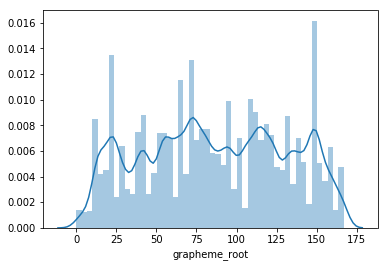

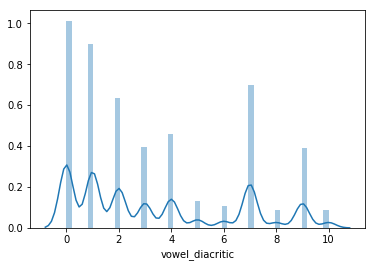

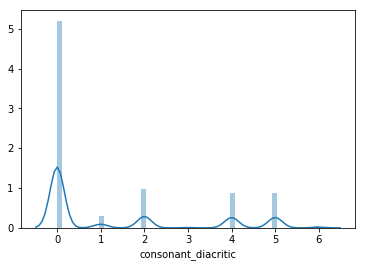

In [15]:
sns.distplot(data.grapheme_root)
plt.show()

sns.distplot(data.vowel_diacritic)
plt.show()

sns.distplot(data.consonant_diacritic)
plt.show()

# Iterative split to create toy set

In [5]:
from iterstrat.ml_stratifiers import MultilabelStratifiedShuffleSplit
import numpy as np

In [10]:
y = data.iloc[:, 1:4]
y

,grapheme_root,vowel_diacritic,consonant_diacritic
0,15,9,5
1,159,0,0
2,22,3,5
3,53,2,2
4,71,9,5
...,...,...,...
200835,22,7,2
200836,65,9,0
200837,2,1,4
200838,152,9,0


In [46]:
??MultilabelStratifiedShuffleSplit

In [44]:
msss = MultilabelStratifiedShuffleSplit(n_splits=1, test_size=0.013, random_state=42)
y = data.iloc[:, 1:4]
for train_index, test_index in msss.split(data, y):
    train, test = data.iloc[train_index, :], data.iloc[test_index, :]
print(train.shape)    
print(test.shape)    

(198229, 5)
(2611, 5)


/home/timetraveller/.local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


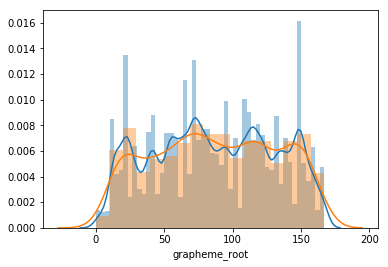

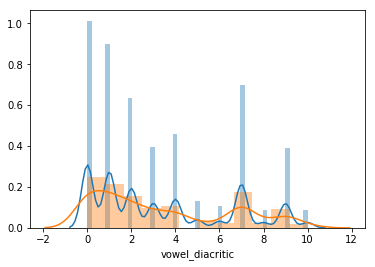

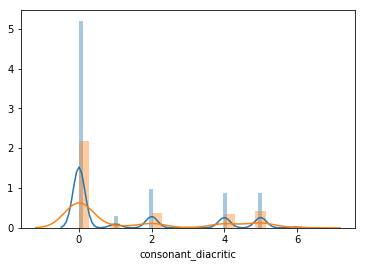

In [45]:
sns.distplot(data.grapheme_root, norm_hist=False)
sns.distplot(test.grapheme_root, norm_hist=True)
plt.show()

sns.distplot(data.vowel_diacritic, norm_hist=False)
sns.distplot(test.vowel_diacritic, norm_hist=True)
plt.show()

sns.distplot(data.consonant_diacritic, norm_hist=True)
sns.distplot(test.consonant_diacritic, norm_hist=True)
plt.show()

# Save toy

In [47]:
test.to_csv('../data/toy_data.csv', index=False)

# Save images

In [2]:
df = pd.read_csv('../data/toy_data.csv')

In [3]:
df

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme
0,Train_126,167,1,0,য়া
1,Train_155,13,6,0,কৃ
2,Train_159,29,0,3,র্ঘ্য
3,Train_203,147,4,0,সু
4,Train_207,127,7,0,ল্টে
...,...,...,...,...,...
2606,Train_200345,141,0,5,ষ্ট্র
2607,Train_200551,133,4,4,শ্যু
2608,Train_200570,36,2,0,ঙ্গি
2609,Train_200665,18,4,0,ক্ষু
